# Persistent Homology of Random Graph States

It's very easy to modify the code from the notebook [Persistent Homology of Entanglement](https://github.com/Amelie-Schreiber/persistent_homology_of_entanglement/blob/main/persistent_homology_of_entanglement.ipynb) to handle arbitrary graphs with custom entangling gates using the [NetworkX Graph Generators](https://networkx.org/documentation/stable/reference/generators.html). Let's look at a few examples. Note, we should always have $0 \leq M_{i,j} = S(\rho_i) + S(\rho_j) - S(\rho_{i,j}) \leq 2 \ln(2)$ and $2 \ln(2) \geq D_{i,j} = 2\ln(2) - M_{i,j} \geq 0$ as the additive inverse quantum mutual information gives a distance metric $D_{i,j}$ between pairs of qubits with reduced density matrices $\rho_i$ and $\rho_i$. This is a distance metric that brings strongly entangled sites $(M \to 2 \ln 2)$ close together $(D \to 0)$, while non-entangled sites $(M \to 0)$ are far apart $(D \to 2 \ln 2)$. Beware, the computational complexity of computing mutual information between each pair of qubits explodes exponentially in the number of qubits for complete graphs. For sparser random graphs however, things are computationally less expensive. 

In [1]:
pip install cirq qiskit gudhi networkx matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info.random import random_unitary

def qiskit_graph_state_circuit(num_qubits):
    """Returns a graph state circuit on num_qubits qubits"""
    # Generate a random graph with num_qubits nodes
    graph = nx.gnp_random_graph(num_qubits, 0.5)

    # Initialize the circuit with the given qubits
    qubits = QuantumRegister(num_qubits)
    circuit = QuantumCircuit(qubits)

    # Apply Hadamard gates to all qubits
    circuit.h(qubits)

    # Apply random controlled unitary gates to each edge
    for edge in graph.edges():
        control_qubit, target_qubit = qubits[edge[0]], qubits[edge[1]]

        # Generate a random unitary matrix
        random_unitary_matrix = random_unitary(2).data

        # Apply the controlled random unitary gate to the circuit
        controlled_unitary_gate = UnitaryGate(random_unitary_matrix).control()
        circuit.append(controlled_unitary_gate, [control_qubit, target_qubit])

    # Define number of qubits in circuit
    # circuit.num_qubits = len(circuit.qubits)

    return circuit

In [3]:
num_qubits = 13
circuit2 = qiskit_graph_state_circuit(num_qubits)
circuit2.draw()

┌───┐                                                                  »
 q0_0: ┤ H ├─────■──────────■──────────■─────────────────────■────────────────»
       ├───┤┌────┴────┐     │          │                     │                »
 q0_1: ┤ H ├┤ Unitary ├─────┼──────────┼──────────■──────────┼──────────■─────»
       ├───┤└─────────┘     │          │          │          │          │     »
 q0_2: ┤ H ├─────■──────────┼──────────┼──────────┼──────────┼──────────┼─────»
       ├───┤┌────┴────┐     │          │          │          │          │     »
 q0_3: ┤ H ├┤ Unitary ├─────┼──────────┼──────────┼──────────┼──────────┼─────»
       ├───┤└─────────┘┌────┴────┐     │     ┌────┴────┐     │          │     »
 q0_4: ┤ H ├───────────┤ Unitary ├─────┼─────┤ Unitary ├─────┼──────────┼─────»
       ├───┤           └─────────┘┌────┴────┐└─────────┘     │     ┌────┴────┐»
 q0_5: ┤ H ├──────────────────────┤ Unitary ├────────────────┼─────┤ Unitary ├»
       ├───┤                      └─────────┘           ┌────┴────┐└─────────┘»
 q0_6: ┤ H ├────────────────────────────────────────────┤ Unitary ├───────────»
       ├───┤                                            └─────────┘           »
 q0_7: ┤ H ├──────────────────────────────────────────────────────────────────»
       ├───┤                                                                  »
 q0_8: ┤ H ├──────────────────────────────────────────────────────────────────»
       ├───┤                                                                  »
 q0_9: ┤ H ├──────────────────────────────────────────────────────────────────»
       ├───┤                                                                  »
q0_10: ┤ H ├──────────────────────────────────────────────────────────────────»
       ├───┤                                                                  »
q0_11: ┤ H ├──────────────────────────────────────────────────────────────────»
       ├───┤                                                                  »
q0_12: ┤ H ├──────────────────────────────────────────────────────────────────»
       └───┘                                                                  »
«                                                                         »
« q0_0: ─────■─────────────────────■────────────────────────────────■─────»
«            │                     │                                │     »
« q0_1: ─────┼─────────────────────┼──────────■─────────────────────┼─────»
«            │                     │          │                     │     »
« q0_2: ─────┼──────────■──────────┼──────────┼─────────────────────┼─────»
«            │          │          │          │                     │     »
« q0_3: ─────┼──────────┼──────────┼──────────┼──────────■──────────┼─────»
«            │          │          │          │          │          │     »
« q0_4: ─────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────»
«            │     ┌────┴────┐     │          │     ┌────┴────┐     │     »
« q0_5: ─────┼─────┤ Unitary ├─────┼──────────┼─────┤ Unitary ├─────┼─────»
«            │     └─────────┘     │          │     └─────────┘     │     »
« q0_6: ─────┼─────────────────────┼──────────┼─────────────────────┼─────»
«       ┌────┴────┐                │     ┌────┴────┐                │     »
« q0_7: ┤ Unitary ├────────────────┼─────┤ Unitary ├────────────────┼─────»
«       └─────────┘                │     └─────────┘                │     »
« q0_8: ───────────────────────────┼────────────────────────────────┼─────»
«                                  │                                │     »
« q0_9: ───────────────────────────┼────────────────────────────────┼─────»
«                             ┌────┴────┐                           │     »
«q0_10: ──────────────────────┤ Unitary ├───────────────────────────┼─────»
«                             └─────────┘                      ┌────┴────┐»
«q0_11: ───────────────────────────────────────────────────────┤ Unitary ├»
«                      

### Get the Density Matrix of the Circuit

In [4]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.quantum_info import DensityMatrix

circuit = circuit2

# Simulate the circuit using the statevector_simulator backend
backend = Aer.get_backend('statevector_simulator')
transpiled_circuit = transpile(circuit, backend)
result = backend.run(transpiled_circuit).result()

# Get the statevector from the result
statevector = result.get_statevector()

# Convert the statevector to a density matrix
rho = DensityMatrix(statevector)

# Print the density matrix
print(rho)


DensityMatrix([[ 1.22070312e-04+0.00000000e+00j,
                 7.33889128e-06-4.55689047e-05j,
                 6.20774847e-05-1.17563825e-04j, ...,
                 6.25137790e-06+1.07584689e-05j,
                 3.62801104e-06+1.73665970e-06j,
                 1.73879224e-05-1.42895723e-05j],
               [ 7.33889128e-06+4.55689047e-05j,
                 1.74521090e-05+0.00000000e+00j,
                 4.76187416e-05+1.61055937e-05j, ...,
                -3.64030741e-06+2.98044357e-06j,
                -4.30179139e-07+1.45874654e-06j,
                 6.37966935e-06+5.63182766e-06j],
               [ 6.20774847e-05+1.17563825e-04j,
                 4.76187416e-05-1.61055937e-05j,
                 1.44792512e-04+0.00000000e+00j, ...,
                -7.18222909e-06+1.14916933e-05j,
                 1.72437027e-07+4.37723400e-06j,
                 2.26044746e-05+9.47920870e-06j],
               ...,
               [ 6.25137790e-06-1.07584689e-05j,
                -3.64030741e-06

### Compute the Distance Matrix Given by (Inverse) Quantum Mutual Information

In [5]:
import numpy as np
from qiskit.quantum_info import partial_trace, entropy

def compute_inverse_mutual_information(rho):
    """
    Computes the inverse quantum mutual information for every pair of qubits in the input density matrix.

    Args:
        rho (DensityMatrix): a DensityMatrix object representing the state of n qubits.

    Returns:
        numpy.ndarray: an n x n matrix of inverse quantum mutual information values, where element i,j gives the inverse
        mutual information between qubits i and j.
    """
    # Convert the DensityMatrix to a numpy.ndarray
    rho = rho.data

    # Determine the number of qubits n from the shape of rho.
    n = int(np.log2(rho.shape[0]))

    # Create an empty n x n matrix to store the inverse mutual information.
    inverse_mutual_information_matrix = np.zeros((n, n))

    # Loop over all pairs of qubits (i, j).
    for i in range(n):
        for j in range(i+1, n):

            # Define the indices of the qubits to trace out.
            trace_indices = [k for k in range(n) if k != i and k != j]

            # Trace out the other qubits to obtain the reduced density matrix of qubits i and j.
            rho_ij = partial_trace(rho, trace_indices)

            # Compute the von Neumann entropy of the reduced density matrix of qubit i.
            entropy_i = entropy(partial_trace(rho_ij, [1]))

            # Compute the von Neumann entropy of the reduced density matrix of qubit j.
            entropy_j = entropy(partial_trace(rho_ij, [0]))

            # Compute the mutual information between qubits i and j.
            qmi = entropy_i + entropy_j - entropy(rho_ij)

            # Compute the inverse mutual information between qubits i and j.
            inverse_mutual_information_matrix[i, j] = 2 * np.log(2) - qmi

    # Copy the upper triangular part of the matrix to the lower triangular part.
    inverse_mutual_information_matrix += inverse_mutual_information_matrix.T - np.diag(inverse_mutual_information_matrix.diagonal())

    return inverse_mutual_information_matrix

qmi_distance_matrix = compute_inverse_mutual_information(rho)
qmi_distance_matrix


array([[0.        , 1.16359882, 1.38120453, 1.38625745, 1.22613646,
        1.37951652, 1.38113249, 1.37549987, 1.38056487, 1.38380198,
        1.38456571, 1.33454949, 1.37311387],
       [1.16359882, 0.        , 1.3789664 , 1.3857464 , 1.25588031,
        1.36303965, 1.37984052, 1.37196095, 1.38186825, 1.38462755,
        1.38441836, 1.36987264, 1.36403291],
       [1.38120453, 1.3789664 , 0.        , 1.36342322, 1.37788402,
        1.38191564, 1.37662134, 1.38488462, 1.38487597, 1.35210748,
        1.3791762 , 1.37634066, 1.38101644],
       [1.38625745, 1.3857464 , 1.36342322, 0.        , 1.3861889 ,
        1.22594649, 1.382507  , 1.36452869, 1.38439968, 1.3565108 ,
        1.38356969, 1.3799255 , 1.38336381],
       [1.22613646, 1.25588031, 1.37788402, 1.3861889 , 0.        ,
        1.38259231, 1.38340307, 1.35041364, 1.37690134, 1.38180648,
        1.38424111, 1.37584413, 1.37430981],
       [1.37951652, 1.36303965, 1.38191564, 1.22594649, 1.38259231,
        0.        , 1.38534

In [6]:
import gudhi as gd

def persistent_homology(qmi_distance_matrix, dimension):
    """
    Computes the persistent homology for the QMI distance matrix.

    Args:
        qmi_distance_matrix (numpy.ndarray): An n x n QMI distance matrix.
        dimension (int): The maximum dimension for the simplices to compute persistent homology. Default is 1.

    Returns:
        list: A list of tuples representing the persistent homology. Each tuple contains two elements: the first
        element is the dimension of the feature, and the second element is a tuple representing the birth and death
        of the feature.
    """
    # Create a Rips complex from the QMI distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=qmi_distance_matrix, max_edge_length= 2*np.log(2))

    # Create a simplex tree from the Rips complex
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=dimension)

    # Compute the persistent homology
    persistence = simplex_tree.persistence()

    return persistence

In [7]:
persistence = persistent_homology(qmi_distance_matrix, 2)
persistence

[(1, (1.3640329110990923, 1.3798405171799464)),
 (1, (1.36303965288659, 1.3719609491255076)),
 (1, (1.370266506600924, 1.376087020893349)),
 (1, (1.3757194634551602, 1.3780910349711653)),
 (1, (1.376340664043756, 1.3784875237844945)),
 (1, (1.376621337622094, 1.3780910349711653)),
 (1, (1.3794612231111623, 1.380020487649524)),
 (0, (0.0, inf)),
 (0, (0.0, 1.3595316913766646)),
 (0, (0.0, 1.3582833792690017)),
 (0, (0.0, 1.3521074774300408)),
 (0, (0.0, 1.3504136437895424)),
 (0, (0.0, 1.3345494889767062)),
 (0, (0.0, 1.3261670561725338)),
 (0, (0.0, 1.3224747280079845)),
 (0, (0.0, 1.2984290764624067)),
 (0, (0.0, 1.2854521995610735)),
 (0, (0.0, 1.2261364639008998)),
 (0, (0.0, 1.225946491646025)),
 (0, (0.0, 1.1635988238664108))]

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

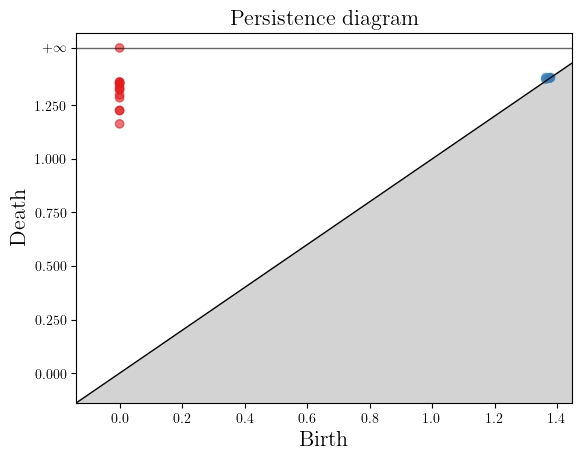

In [8]:
gd.plot_persistence_diagram(persistence)

<Axes: title={'center': 'Persistence barcode'}>

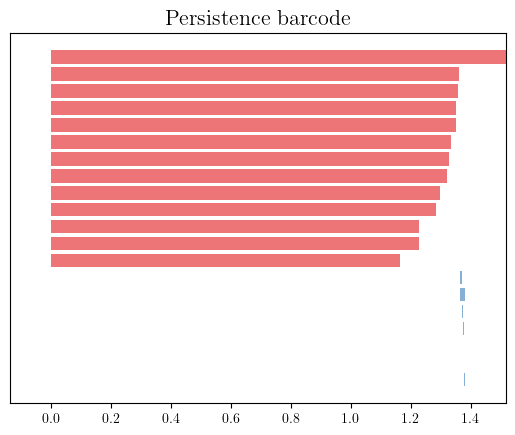

In [9]:
gd.plot_persistence_barcode(persistence)